<a href="https://colab.research.google.com/github/jbblancojr/endangered_species/blob/main/A_Team1ProjectProposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BA810: Supervised Machine Learning

###Grup Project - Phase 1

###Dr. Nachiketa Sahoo

###Team 1 - Bennett Blanco, Camila Daza, Sofia Lopez-Somohano, Jose Salerno

##Species Survival Forecast: Analyzing Extinction Risks with Machine Learning




###Problem Definition

Our team has identified a fascinating gap in the market, a previously unexplored avenue for leveraging the power of machine learning to predict the risk factors contributing to species extinction. We aim to analyze the relationship between species data, environmental factors, and climate-related variables to understand their interplay and potential impact on species survival and extinction.

###Data Sources and Description of Data

To accomplish this goal, we first dive deep into the biodiversity factors of over 90,000 species, gaining a comprehensive understanding of their habitats. We gathered this data from The World Bank’s Global Species Database, which includes the variable we aim to predict, ‘iucn_category’ or IUCN Red List Categories. The categories include Data Deficient (DD), Least Concern (LC), Near Threatened (NT), Vulnerable (VU), Endangered (EN), and Critically Endangered (CE). We have decided to drop DD as it does not give valuable information to predict categories. Other information in The World Bank dataset includes species name, group, species range, and country.
Furthermore, we gathered data on crucial environmental factors from The World Bank’s Climate Knowledge Portal and the International Monetary Fund, such as annual surface temperature changes, frequency of climate-related disasters, population density, and precipitation.  Finally, we collected data from the Emissions Database for Global Atmospheric Research (EDGAR) to access Global Greenhouse gas (GHG) emissions information for every country. This enables us to conduct a more comprehensive analysis of our data, leading to improved recommendations for each country's government.
After combining and cleaning these two datasets into a new dataset titled ‘species,’ we have over 250,000 entries and 19 columns in the dataset. The dataset contains a mixture of numerical (float, int) and categorical (object) variables, allowing us to better understand the causes of IUCN Red List Categories.


##Initial Exploration

Through our initial exploration, we corroborated the expectations of our dataset, which consists primarily of animals and plants in the Least Concern IUCN category, with over 200,000 entries falling into this category. Furthermore, we saw that the most frequent countries in our dataset include the USA, India, and Australia, while the most endangered animal groups in our data sets include Salt Water Fish, IUCN Plants, and Mammals.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
species = pd.read_csv('/content/gdrive/MyDrive/BA810-GroupProj/learning_set_w_GHG.csv')

<ipython-input-3-c32e03e527ea>:2: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  species=pd.read_csv('learning_set_w_GHG.csv')


In [ ]:
species.head(3)

,Unnamed: 0.1,Unnamed: 0,group,binomial,iucn_id_no,common_name,name_language,iucn_category,iso_a3,total_area,...,"Climate related disasters frequency, Number of Disasters: Drought","Climate related disasters frequency, Number of Disasters: Extreme temperature","Climate related disasters frequency, Number of Disasters: Flood","Climate related disasters frequency, Number of Disasters: Landslide","Climate related disasters frequency, Number of Disasters: Storm","Climate related disasters frequency, Number of Disasters: TOTAL","Climate related disasters frequency, Number of Disasters: Wildfire",Population Density,Change in Precipitation,GHG emissions
0,0,0,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,IDN,128005.5600,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611
1,1,271,Amphibians,Alcalus baluensis,79935161.0,Balu Eastern Frog,eng,LC,IDN,240233.7000,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611
2,2,274,Amphibians,Alcalus rajae,42863256.0,King Dwarf Mountain Frog,eng,NT,IDN,2237.9141,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611


In [ ]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517655 entries, 0 to 517654
Data columns (total 26 columns):
 #   Column                                                                         Non-Null Count   Dtype  
---  ------                                                                         --------------   -----  
 0   Unnamed: 0.1                                                                   517655 non-null  int64  
 1   Unnamed: 0                                                                     517655 non-null  int64  
 2   group                                                                          517655 non-null  object 
 3   binomial                                                                       517655 non-null  object 
 4   iucn_id_no                                                                     256612 non-null  float64
 5   common_name                                                                    216991 non-null  object 
 6   name_languag

In [ ]:
# Drop blank rows
species.dropna(subset=['iucn_id_no'], inplace=True)
species.dropna(subset=['Population Density'], inplace=True)

In [ ]:
# Fill blank rows in Climate disasters to 0
species['Surface Temperature Change'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Drought'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Landslide'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Flood'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Storm'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Wildfire'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Extreme temperature'].fillna(0, inplace=True)
species['Change in Precipitation'].fillna(0, inplace = True)

In [ ]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'binomial', 'iucn_id_no', 'iso_a3', 'common_name','name_language', 'wb_iso', 'Climate related disasters frequency, Number of Disasters: TOTAL']
species = species.drop(columns=columns_to_drop)

In [ ]:
# Drop rows with iucn_category = 'DD' (Data Deficient)
species = species[species['iucn_category'] != 'DD']

In [ ]:
# Rename columns
rename = {'Climate related disasters frequency, Number of Disasters: Drought': 'drought',
          'Climate related disasters frequency, Number of Disasters: Landslide': 'landslide',
          'Climate related disasters frequency, Number of Disasters: Flood': 'flood',
          'Climate related disasters frequency, Number of Disasters: Storm': 'storm',
          'Climate related disasters frequency, Number of Disasters: Wildfire': 'wildfire',
          'Climate related disasters frequency, Number of Disasters: Extreme temperature': 'extreme_temp',
          'Inhabited Area within Country':'inhabited_area_country',
          'Surface Temperature Change': 'surface_temp_change',
          'Population Density':'population_density',
          'Change in Precipitation':'change_precipitation',
          'GHG emissions':'GHG_emissions'


}
species.rename(columns=rename, inplace=True)

In [ ]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220909 entries, 0 to 517654
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   group                   220909 non-null  object 
 1   iucn_category           220909 non-null  object 
 2   total_area              220909 non-null  float64
 3   small_range             220909 non-null  int64  
 4   wb_datanam              220909 non-null  object 
 5   inhabited_area_country  220909 non-null  float64
 6   datanam_pct_area        220909 non-null  float64
 7   surface_temp_change     220909 non-null  float64
 8   drought                 220909 non-null  float64
 9   extreme_temp            220909 non-null  float64
 10  flood                   220909 non-null  float64
 11  landslide               220909 non-null  float64
 12  storm                   220909 non-null  float64
 13  wildfire                220909 non-null  float64
 14  population_density  

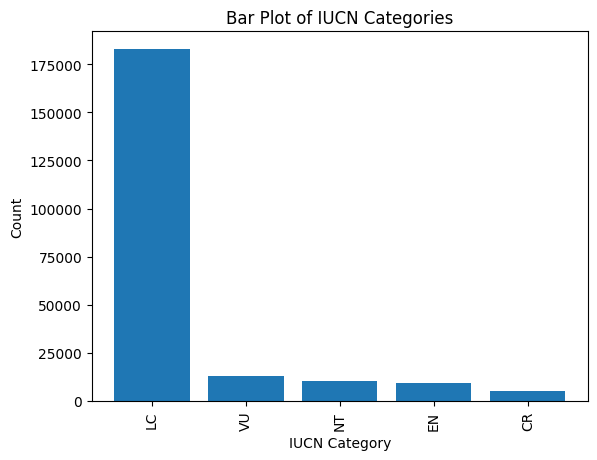

In [ ]:
category_counts = species['iucn_category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('IUCN Category')
plt.ylabel('Count')
plt.title('Bar Plot of IUCN Categories')
plt.xticks(rotation=90)
plt.show()

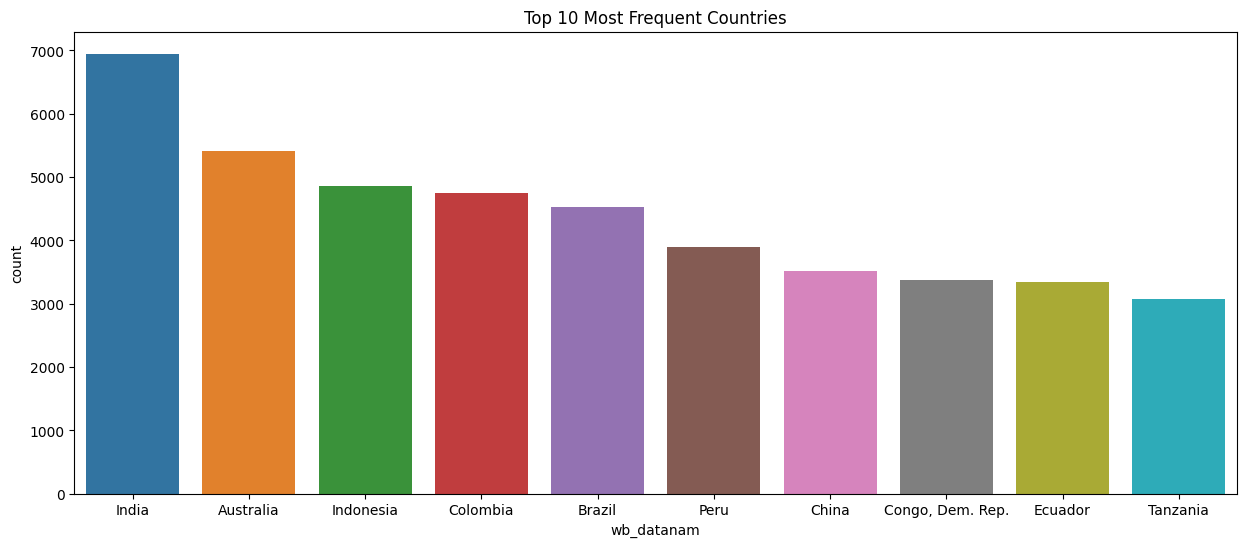

In [ ]:
# Get the top 10 most frequent countries in the dataset
top10_countries = species['wb_datanam'].value_counts().head(10)

# Filter the dataset to include only the top 10 countries
top10_data = species[species['wb_datanam'].isin(top10_countries.index)]

# Create a countplot for the top 10 most frequent countries
plt.figure(figsize=(15, 6))
sns.countplot(x='wb_datanam', data=top10_data, order=top10_countries.index)
plt.title('Top 10 Most Frequent Countries')
plt.show()

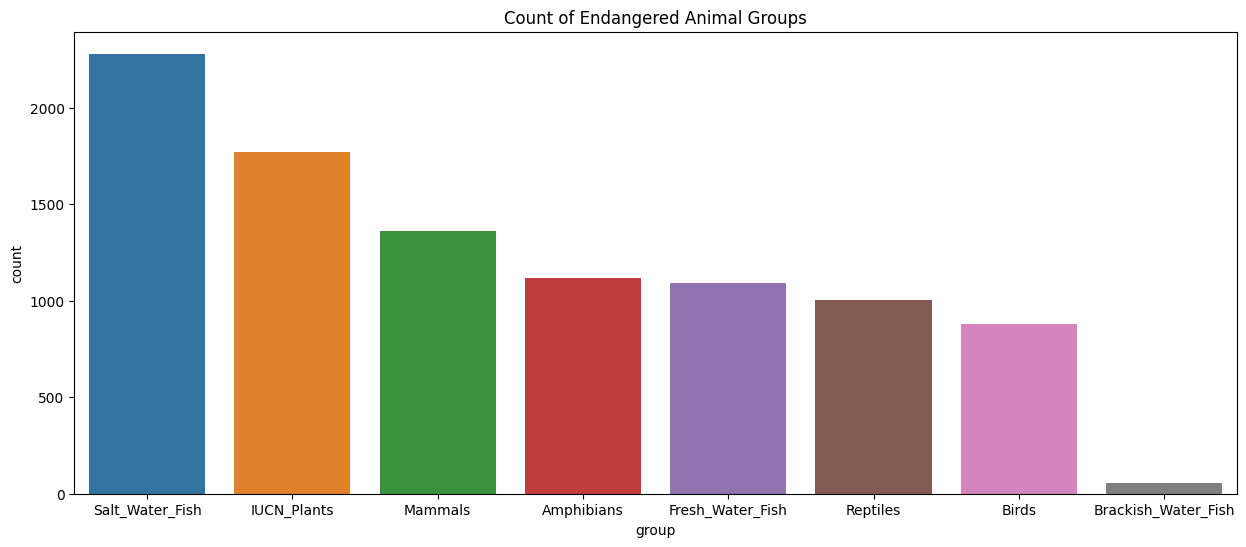

In [ ]:
# Filter the dataset for Endangered animals
en_data = species[species['iucn_category'] == 'EN']

# Create a countplot for the Endagered animal groups
plt.figure(figsize=(15, 6))
sns.countplot(x='group', data=en_data, order=en_data['group'].value_counts().index)
plt.title('Count of Endangered Animal Groups')
plt.show()

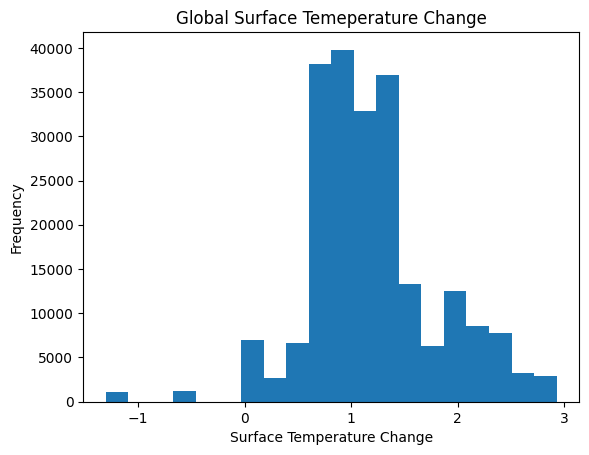

In [ ]:
plt.hist(species['surface_temp_change'], bins = 20)
plt.xlabel('Surface Temperature Change')
plt.ylabel('Frequency')
plt.title('Global Surface Temeperature Change')
plt.show()

In [ ]:
species.corr()

<ipython-input-17-aa6c901cbde2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  species.corr()


,total_area,small_range,inhabited_area_country,datanam_pct_area,surface_temp_change,drought,extreme_temp,flood,landslide,storm,wildfire,GHG_emissions
total_area,1.000000,-0.040307,0.168881,-0.248771,0.085052,-0.024501,0.004515,-0.108516,-0.064072,-0.021537,-0.000227,-0.028876
small_range,-0.040307,1.000000,-0.026298,0.181370,-0.007924,0.000132,0.019830,0.025635,0.024144,0.021229,0.010386,0.007176
inhabited_area_country,0.168881,-0.026298,1.000000,0.124750,-0.012827,0.129198,0.031979,0.205774,0.013944,0.023685,0.038750,0.149480
datanam_pct_area,-0.248771,0.181370,0.124750,1.000000,-0.109128,0.054272,0.075352,0.355876,0.129203,0.114444,0.026265,0.146083
surface_temp_change,0.085052,-0.007924,-0.012827,-0.109128,1.000000,0.090295,0.173039,-0.166188,-0.086687,0.024559,0.085618,0.123570
drought,-0.024501,0.000132,0.129198,0.054272,0.090295,1.000000,0.026548,0.122467,0.060872,-0.027916,0.036334,0.278430
extreme_temp,0.004515,0.019830,0.031979,0.075352,0.173039,0.026548,1.000000,-0.050401,0.068490,0.321387,0.248291,0.190600
flood,-0.108516,0.025635,0.205774,0.355876,-0.166188,0.122467,-0.050401,1.000000,0.353674,0.032922,-0.130262,0.196447
landslide,-0.064072,0.024144,0.013944,0.129203,-0.086687,0.060872,0.068490,0.353674,1.000000,0.137339,-0.085124,0.184779
storm,-0.021537,0.021229,0.023685,0.114444,0.024559,-0.027916,0.321387,0.032922,0.137339,1.000000,-0.072094,0.135471


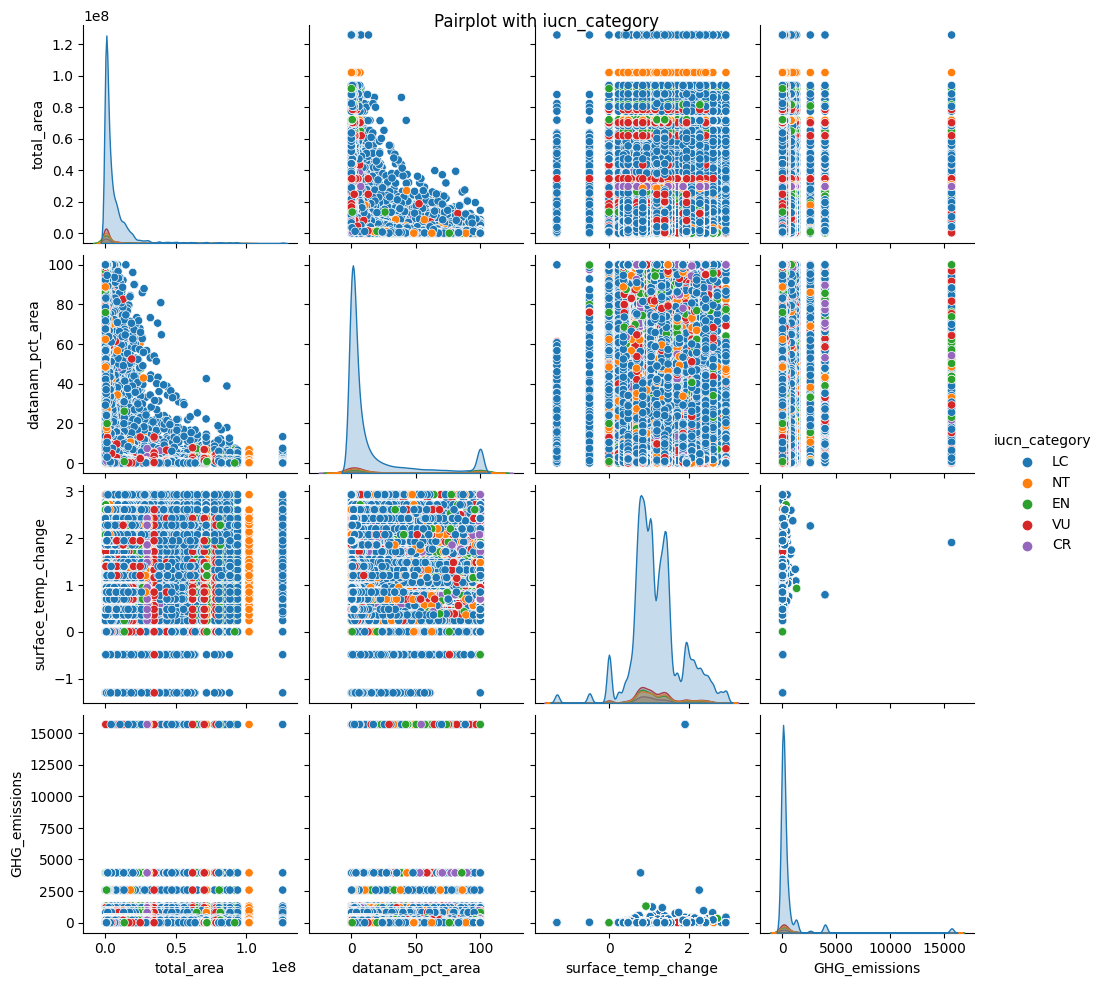

In [ ]:
# Select columns for pairplot
columns_for_pairplot = ['iucn_category', 'total_area', 'datanam_pct_area', 'surface_temp_change', 'GHG_emissions']

# Pairplot with iucn_category
sns.pairplot(species[columns_for_pairplot], hue='iucn_category')
plt.suptitle('Pairplot with iucn_category')
plt.show()

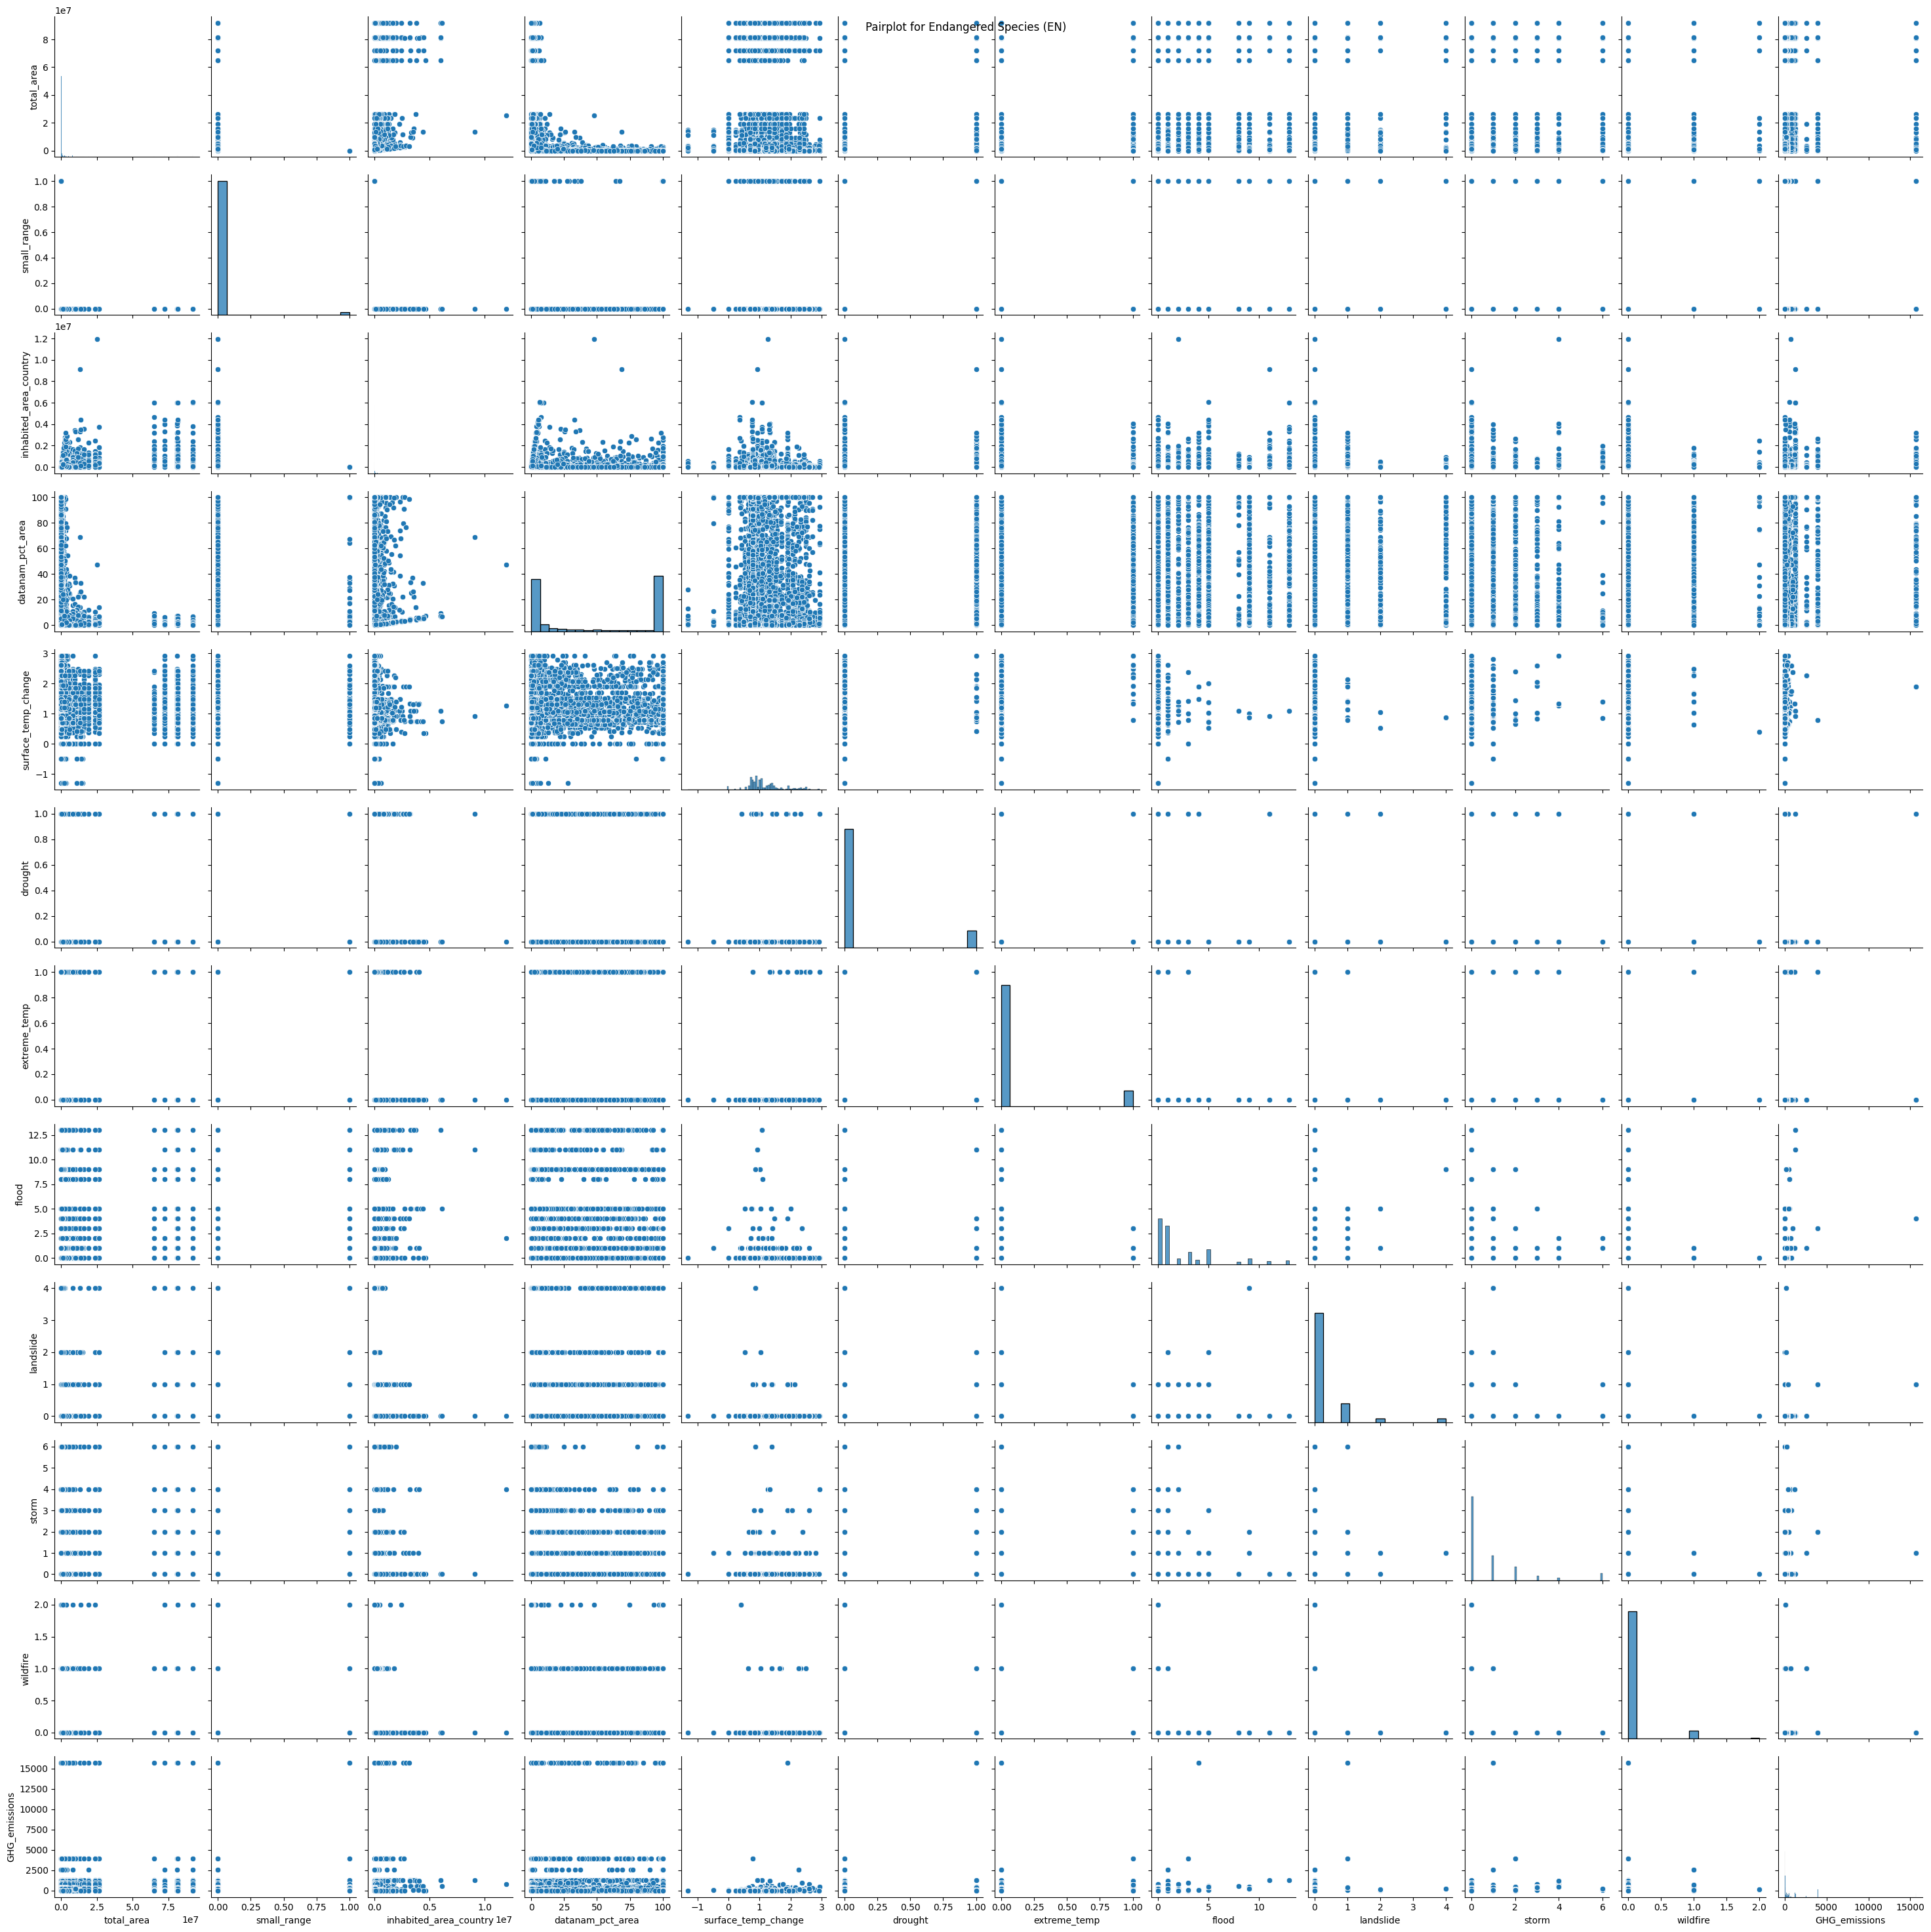

In [ ]:
# Filter the dataset for Endangered animals
en_data = species[species['iucn_category'] == 'EN']

# Pairplot for numerical features specifically for 'EN' category
sns.pairplot(en_data)
plt.suptitle('Pairplot for Endangered Species (EN)')
plt.show()

###Anticipated Results

Since our primary goal is to predict 'iucn_category,' we plan to engage in several classification algorithms and techniques to create the best model. To evaluate the model's performance, we plan to utilize evaluation metrics that account for the imbalanced distribution of categories (the high number of Least Concern) in our dataset. We will focus on metrics such as the confusion matrix, accuracy, precision, recall, and F-measure to ascertain the model's effectiveness across varied IUCN Red List Categories.
Furthermore, we aim to employ feature selection and regularization techniques to create the best model. Overall, we expect to see poor environmental factors leading to higher Vulnerable, Endangered, and Critically Endangered Categories; however, we hope that our model is able to identify which of these environmental factors are most critical.

###Potential Implications and Project's Worth

By successfully creating this predictive model, this analysis could offer insights into how environmental changes and disasters affect different species, potentially influencing conservation efforts and policy-making. We hope to empower countries and regions worldwide to take proactive measures to protect their fauna and flora. Our goal is to enable informed decision-making and inspire preventive initiatives to safeguard the biodiversity of our beloved Earth.
By empowering these nations to address climate change proactively, we aim to uncover the impacts of corporate contributions to the rising levels of greenhouse emissions. This would enable the respective government to enforce stricter penalties on these companies, serving them to prevent further damage to their ecosystems and biodiversity. Furthermore, this project has the potential to shed light on the critical issues of species extinction and lay the groundwork for future research and conservation efforts using machine learning methodologies. We are passionate about making a change in our ever-changing world and generating a positive impact on our environment. Together, we can work toward more sustainability and coexistence with the natural world.
